In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb

# New - may need to install statsmodels and sklearn packages
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # may need to install sklearn - machine learning package

## Week 10 Assignment: Evaluating Linear Regression Model, Conceptually

#### Data:  Pressure, temperature, and precipitation data from Guayaquil, Ecuador, June 1950-1970: 'June_Guayaquil.csv'
- This data is sample data used in your stats textbook!  Pressure, temperature, and precipitation data collected in Ecuador over 20 years of Junes!
<br><br>
- You'll read in the data, do some processing and EDA
<br><br>
- Then, you'll run a linear regression model and interpret the various evaluation metrics!
   - Don't worry - I will give you the code for the linear regression model itself (you'll learn how to do this yourself in a few weeks, formally)
   - You'll just decide what variable is X (predictor) and which is Y (predictand)
   - And then interpret RMSE, R^2, statistical significance, and the residuals!

#### (1)  Read in the data.  What should be your index?  Does the data need cleaning in any way?  Do what is needed.

In [13]:
df = pd.read_csv('data/week10/June_Guayaquil.csv', index_col='Year')
print(df)

      Temperature, C  Precipitation, mm  Pressure, mb
Year                                                 
1951            26.1               43.0        1009.5
1952            24.5               10.0        1010.9
1953            24.8                4.0        1010.7
1954            24.5                0.0        1011.2
1955            24.1                2.0        1011.9
1956            24.3                NaN        1011.2
1957            26.4               31.0        1009.3
1958            24.9                0.0        1011.1
1959            23.7                0.0        1012.0
1960            23.5                0.0        1011.4
1961            24.0                2.0        1010.9
1962            24.1                3.0        1011.5
1963            23.7                0.0        1011.0
1964            24.3                4.0        1011.2
1965            26.6               15.0        1009.9
1966            24.6                2.0        1012.5
1967            24.8        

In [36]:
df.dropna(axis=0, inplace=True)
print(df)

      Temperature, C  Precipitation, mm  Pressure, mb
Year                                                 
1951            26.1               43.0        1009.5
1952            24.5               10.0        1010.9
1953            24.8                4.0        1010.7
1954            24.5                0.0        1011.2
1955            24.1                2.0        1011.9
1957            26.4               31.0        1009.3
1958            24.9                0.0        1011.1
1959            23.7                0.0        1012.0
1960            23.5                0.0        1011.4
1961            24.0                2.0        1010.9
1962            24.1                3.0        1011.5
1963            23.7                0.0        1011.0
1964            24.3                4.0        1011.2
1965            26.6               15.0        1009.9
1966            24.6                2.0        1012.5
1967            24.8                0.0        1011.1
1968            24.4        

#### (2)  
#### (a.) Do exploratory data analysis (specifically, from your lessons, Step #3 of visualizing any relationships, etc., as you already cleaned your data in the previous step).    

#### (b.)  From your EDA, which two variables do you want to run a linear regression on, and why?

In [37]:
corr = df.corr()
type(corr)
print(corr)

                   Temperature, C  Precipitation, mm  Pressure, mb
Temperature, C           1.000000           0.702853     -0.830022
Precipitation, mm        0.702853           1.000000     -0.677534
Pressure, mb            -0.830022          -0.677534      1.000000


In [38]:
print(f'Temperature and precipitation due to the implied strong\n\
relationship between them due to the correlation coefficient of 0.702853')

Temperature and precipitation due to the implied strong
relationship between them due to the correlation coefficient of 0.702853


#### (3)  Now, run the linear regression! 
#### First, set x = your predictor, and y = your predictand.  Make no more changes in this code block, it will create the linear regression for you, as well as spit out the evaluation metrics.

In [39]:
print(df)
x = df['Temperature, C']
y = df['Precipitation, mm']

# I run the linear regression
x2 = sm.add_constant(x) # necessary if we want regression equation to have intercept

mod_uni = sm.OLS(y,x2).fit()
y_pred_uni = mod_uni.fittedvalues

# What if wanted to make predictions using different data for x?
# mod_uni.predict(x2) # make the predictions by the model

      Temperature, C  Precipitation, mm  Pressure, mb
Year                                                 
1951            26.1               43.0        1009.5
1952            24.5               10.0        1010.9
1953            24.8                4.0        1010.7
1954            24.5                0.0        1011.2
1955            24.1                2.0        1011.9
1957            26.4               31.0        1009.3
1958            24.9                0.0        1011.1
1959            23.7                0.0        1012.0
1960            23.5                0.0        1011.4
1961            24.0                2.0        1010.9
1962            24.1                3.0        1011.5
1963            23.7                0.0        1011.0
1964            24.3                4.0        1011.2
1965            26.6               15.0        1009.9
1966            24.6                2.0        1012.5
1967            24.8                0.0        1011.1
1968            24.4        

In [40]:
# Let's print out some model evaluation metrics!
# See your lessons for how to read this "summary"
print(mod_uni.summary())

                            OLS Regression Results                            
Dep. Variable:      Precipitation, mm   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     16.60
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           0.000790
Time:                        00:04:46   Log-Likelihood:                -84.560
No. Observations:                  19   AIC:                             173.1
Df Residuals:                      17   BIC:                             175.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -508.4759    128.089     -3.

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [41]:
# Here is RMSE
rmse_err_uni = mean_squared_error(y, y_pred_uni,squared=False)
print('RMSE = ',rmse_err_uni)

RMSE =  20.730425327252874


In [42]:
# And R^2 (which is also outputted as a part of the above table)
print('R^2 = ',mod_uni.rsquared)

R^2 =  0.49400218242601335


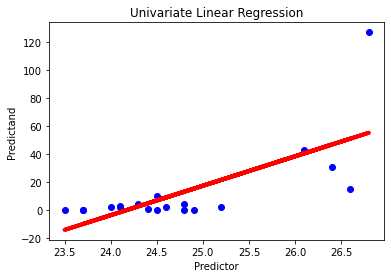

In [43]:
# Here's your linear regression line plotted against your original data, so you can visualize the "fit"

fig,ax=plt.subplots()
ax.scatter(x, y, color='blue')

ax.set_xlabel('Predictor')
ax.set_ylabel('Predictand')
ax.set_title('Univariate Linear Regression')

ax.plot(x, y_pred_uni, color='red',linewidth=4)

Text(0.5, 1.0, 'Residuals')

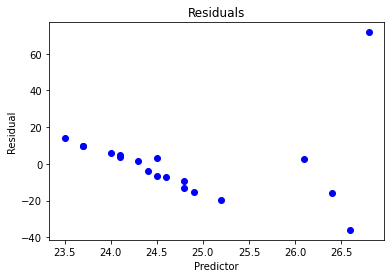

In [44]:
# And here are the residuals from the regression!
fig,ax=plt.subplots()
ax.scatter(x, y-y_pred_uni,color='b')
ax.set_xlabel('Predictor')
ax.set_ylabel('Residual')
ax.set_title('Residuals')

#### (4)  To finish - comment on EACH of the FOUR evaluation metrics for this regression and in at least a FEW sentences for each, discuss what each metric tells us about this regression model we've created AND what each metric tells us about how "good' this model is.  
#### Then, based on all four metrics, give your overall evaluation of the regression model and how 'good' it is, including anything we could consider doing differently to improve this model.
#### (a)  R^2 
#### (b) RMSE
#### (c) Statistical significance
#### (d) Patterns in residuals
#### (e) Overall conclusion based on the four evaluation metrics, and any future steps for improvement!

### (a) R^2
Our R<sup>2</sup> value indicates that while this model is likely a good first attempt a a predictor, it is likely requiers tuning to perform optimally.

### (b) RMSE
Our RMSE indicates that this model is likely accurate to +/- 20 degrees. That seems ok for this model given the lack of data.

### (c) Statistical significance
The p-values here confirm unequivocally that there is a strong statistically significant relationship between our variables. 

### (d) Patterns in residuals
The residuals exhibit a clear linear pattern. This indicates that we likely have a fundamental problem with our model, and we should evaluate if this prediction is indeed appropriate based upon the input dataset.

### (e) Overall conclusion about your model
While there is a strong statistically significant correlation here, I think that this model is only useful for this one spot, and should be taken with a <i>very</i> strong grain of salt due to the many other factors that influence the temperature.